In [60]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Divergence problem

##### Variant A

In [62]:
path = 'D:\Studia\MAGISTERKA\semestr_1\data_analytics\lab3\stan1.stan'
model = CmdStanModel(stan_file=path)

INFO:cmdstanpy:found newer exe file, not recompiling


In [63]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [64]:
print(result.diagnose())

Processing csv files: C:\Users\HW\AppData\Local\Temp\tmp987hbivr\stan1-20220316114702_1.csv, C:\Users\HW\AppData\Local\Temp\tmp987hbivr\stan1-20220316114702_2.csv, C:\Users\HW\AppData\Local\Temp\tmp987hbivr\stan1-20220316114702_3.csv, C:\Users\HW\AppData\Local\Temp\tmp987hbivr\stan1-20220316114702_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
256 of 4000 (6.40%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [65]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

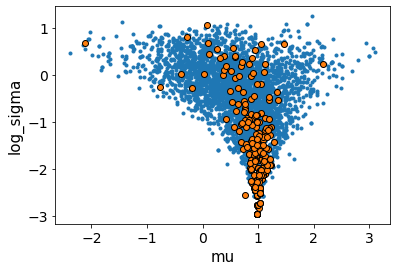

In [66]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

##### Variant B

In [69]:
model = CmdStanModel(stan_file=path)

INFO:cmdstanpy:found newer exe file, not recompiling


In [70]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [71]:
print(result.diagnose())

Processing csv files: C:\Users\HW\AppData\Local\Temp\tmp987hbivr\stan1-20220316114800_1.csv, C:\Users\HW\AppData\Local\Temp\tmp987hbivr\stan1-20220316114800_2.csv, C:\Users\HW\AppData\Local\Temp\tmp987hbivr\stan1-20220316114800_3.csv, C:\Users\HW\AppData\Local\Temp\tmp987hbivr\stan1-20220316114800_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [72]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

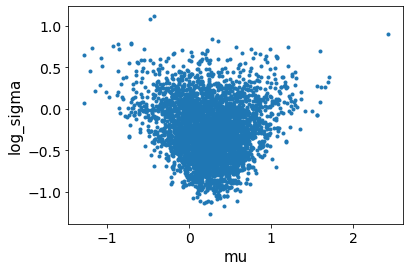

In [73]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

## Excercise 2 - Binominial example

In [74]:
#Data read fromm coin.csv
coins = pd.read_csv('D:\Studia\MAGISTERKA\semestr_1\data_analytics\lab3\coin.csv')
y = coins['Toss_Result']
N = coins.shape[0]

In [76]:
path2 = 'D:\Studia\MAGISTERKA\semestr_1\data_analytics\lab3\stan2.stan'
model = CmdStanModel(stan_file=path2)
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [78]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01800,0.720,-290.00,-290.00,-290.0,1600.0,11000.0,1.0
theta,0.46,0.00066,0.025,0.42,0.46,0.5,1400.0,9200.0,1.0


In [77]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

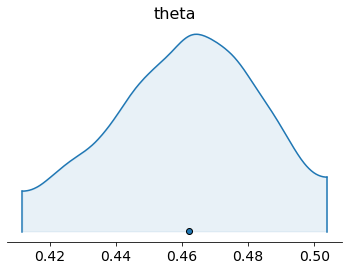

In [79]:
#Plot
az.plot_density(arviz_result,shade=0.1)

## Excercise 3 - Predictive checks


In [80]:
#Data read from normal.csv
normal = pd.read_csv('D:\Studia\MAGISTERKA\semestr_1\data_analytics\lab3\\normal.csv')
y = normal['value']
N = normal.shape[0]

#### Posterior predictive

In [81]:
path3 = path = 'D:\Studia\MAGISTERKA\semestr_1\data_analytics\lab3\stan3.stan'
model = CmdStanModel(stan_file=path3)

INFO:cmdstanpy:found newer exe file, not recompiling


In [82]:
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status





chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [83]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-53.0000,0.0250,1.000,-55.00,-53.0000,-52.00,1700.0,1600.0,1.0
mu,-0.0350,0.0019,0.100,-0.21,-0.0350,0.14,3100.0,2900.0,1.0
sigma,1.0000,0.0012,0.072,0.91,1.0000,1.10,3300.0,3100.0,1.0
y_rep[1],-0.0160,0.0160,1.000,-1.70,-0.0097,1.70,4228.0,3890.0,1.0
y_rep[2],-0.0670,0.0160,1.000,-1.70,-0.0790,1.60,4112.0,3783.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],-0.0330,0.0160,1.000,-1.70,-0.0350,1.60,3935.0,3620.0,1.0
y_rep[97],-0.0630,0.0170,1.000,-1.80,-0.0620,1.70,3800.0,3496.0,1.0
y_rep[98],-0.0088,0.0170,1.000,-1.70,-0.0110,1.70,3994.0,3675.0,1.0


In [84]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<AxesSubplot:xlabel='y / y_rep'>

C:\Users\HW\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


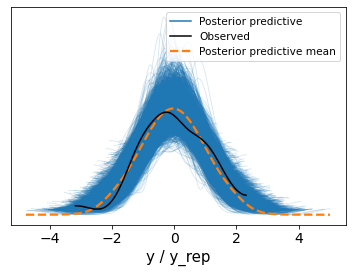

In [85]:
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

#### Prior predictive

In [86]:
path4 = 'D:\Studia\MAGISTERKA\semestr_1\data_analytics\lab3\stan4.stan'
model = CmdStanModel(stan_file=path4)

INFO:cmdstanpy:found newer exe file, not recompiling


In [87]:
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [88]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0000,NaN,0.0,0.000,0.0000,0.0,NaN,NaN,NaN
mu,-0.0220,0.031,1.0,-1.700,-0.0150,1.6,1100.0,8200.0,1.0
sigma,0.7900,0.019,0.6,0.041,0.6700,1.9,1000.0,7900.0,1.0
y_prior[1],-0.0540,0.042,1.4,-2.300,-0.0740,2.3,1126.0,8801.0,1.0
y_prior[2],0.0360,0.045,1.4,-2.100,-0.0077,2.4,1003.0,7837.0,1.0
...,...,...,...,...,...,...,...,...,...
y_prior[96],-0.0490,0.042,1.3,-2.200,-0.0060,2.0,1045.0,8163.0,1.0
y_prior[97],0.0027,0.050,1.4,-2.100,0.0300,2.2,770.0,6015.0,1.0
y_prior[98],-0.0190,0.041,1.4,-2.100,-0.0500,2.3,1178.0,9203.0,1.0


In [89]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

<AxesSubplot:xlabel='y / y_prior'>

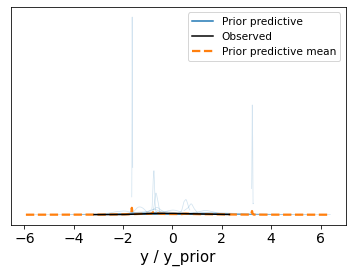

In [90]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

Text(0.5, 1.0, 'y_prior histogram')

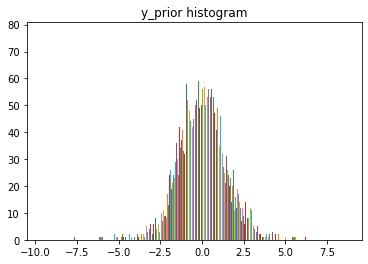

In [91]:
#Draw y_prior histogram
y_prior = result.stan_variable('y_prior')
plt.hist(y_prior,bins=100)
plt.title('y_prior histogram')